# Exercise 3

#### https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_gabor.html

In [27]:
# Done by Munther Odeh and Timo Marks
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from skimage.color import rgb2gray
from skimage.filters import gabor_kernel
from skimage.util import img_as_float
from scipy import ndimage as ndi
plt.rcParams.update({'font.size': 16, 'legend.title_fontsize': 16, 'legend.fontsize': 16, "axes.labelsize": 16, "axes.labelpad": 4})


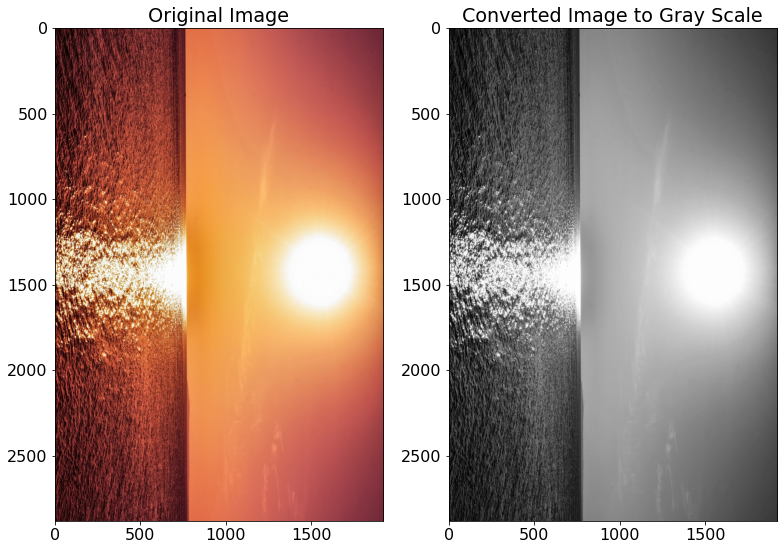

In [47]:
fig = plt.figure(figsize=(20, 20))
filename="sun-set-rotated.jpg"
img = plt.imread("Images/"+filename)
gray_img = rgb2gray(img)

fig1 = fig.add_subplot(1,3,1)
fig1.imshow(img)
fig1.title.set_text('Original Image')

fig2 = fig.add_subplot(1,3,2)
fig2.imshow(gray_img, cmap="gray")
fig2.title.set_text('Converted Image to Gray Scale')

# Image Loading

In [49]:
image_filename = ["python-hero.jpg", "python-code.jpg", "sun-set.jpg", "sun-set-rotated.jpg"]
image_colour = []
image_gray = []
shrink = (slice(0, None, 3), slice(0, None, 3))

for img_file in image_filename:
    img = plt.imread("Images/"+img_file)
    img = img_as_float(img)[shrink]
    image_colour.append(img)
    image_gray.append(rgb2gray(img))
    gray_img = rgb2gray(img)

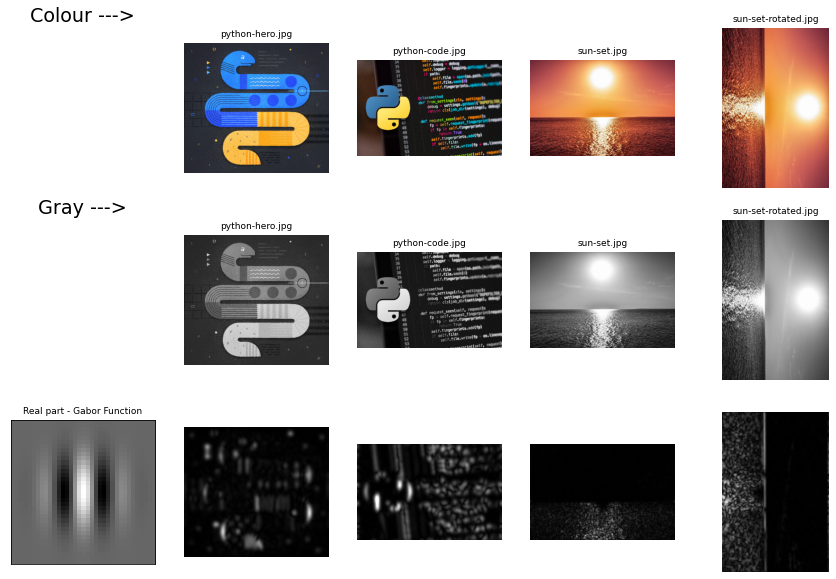

In [50]:
# Does the actual computation 
def power(image, kernel):
    # Normalize images for better comparison.
    image = (image - image.mean()) / image.std()
    return np.sqrt(ndi.convolve(image, np.real(kernel), mode='wrap')**2 +
                   ndi.convolve(image, np.imag(kernel), mode='wrap')**2)

results = []
kernel_params = []
for theta in [0]:
    theta = theta / 4. * np.pi
    for frequency in [0.1]:
        kernel = gabor_kernel(frequency, theta=theta)
        params = 'theta=%d,\nfrequency=%.2f' % (theta * 180 / np.pi, frequency)
        kernel_params.append(params)
        # Save kernel and the power image for each image
        results.append((kernel, [power(img, kernel) for img in image_gray]))

fig, axes = plt.subplots(nrows=3, ncols=len(image_filename)+1, figsize=(15, 10))
# Plot original images
axes[0][0].axis('off') 
axes[0][0].set_title("Colour --->")
for label, img, ax in zip(image_filename, image_colour, axes[0][1:]):
    ax.imshow(img)
    ax.set_title(label, fontsize=9)
    ax.axis('off')

# Plot gray image
axes[1][0].axis('off') 
axes[1][0].set_title("Gray --->")
# From now on plot every picture in gray values
plt.gray()
for label, img, ax in zip(image_filename, image_gray, axes[1][1:]):
    ax.imshow(img)
    ax.set_title(label, fontsize=9)
    ax.axis('off')

# Plot Gabor Function
for label, (gabor, powers), ax_rows in zip(kernel_params, results, axes[2:]):
    ax = ax_rows[0] # First column
    ax.imshow(np.real(gabor))
    ax.set_title("Real part - Gabor Function", fontsize=9)
    ax.set_xticks([])
    ax.set_yticks([])

    # Plot Gabor responses with the contrast normalized for each filter
    # vmin = np.min(powers)
    # vmax = np.max(powers)
    for gabor_result, ax in zip(powers, ax_rows[1:]):
        ax.imshow(gabor_result, vmin=vmin, vmax=vmax)
        ax.axis('off')